## Day 3 Exercises

In [3]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

%notebook inline

In [4]:
PATH = 'data/ign.csv'
PATH

'data/ign.csv'

In [5]:
data = pd.read_csv(PATH)
data = data.drop(["Unnamed: 0"], axis=1)
data = data.dropna()
data = data.reset_index()

In [6]:
data.sample(5)

index score_phrase                             title  \
16821  16854        Great                      Gunman Clive   
5201    5205     Mediocre                   Starsky & Hutch   
6095    6099        Great           Silent Hill 4: The Room   
1680    1684         Okay  Nightlong: Union City Conspiracy   
15899  15930         Okay           Dragon Age II -- Legacy   

                                                   url      platform  score  \
16821            /games/gunman-clive-141118/3ds-152010  Nintendo 3DS    8.7   
5201                    /games/starsky-hutch/pc-482056            PC    5.5   
6095         /games/silent-hill-4-the-room/xbox-627085          Xbox    8.0   
1680   /games/nightlong-union-city-conspiracy/pc-10449            PC    6.8   
15899      /games/dragon-age-ii-legacy/xbox-360-112984      Xbox 360    6.5   

                genre editors_choice  release_year  release_month  release_day  
16821      Platformer              N          2013              2           22  
5201   Racing, Action              N          2003             10           16  
6095        Adventure              N          2004              9            7  
1680        Adventure              N          1999             11            4  
15899             RPG              N          2011              8            2

### What is the first game ever released?

In [7]:
min_years = data[data.release_year == min(data.release_year)]
min_months = min_years[min_years.release_month == min(min_years.release_month)]
earliest = min_months[min_months.release_day == min(min_months.release_day)].iloc[0]

In [8]:
title = earliest.title
day = earliest.release_day
month = earliest.release_month
year = earliest.release_year

In [9]:
print("The first game ever released is '%s' on %s-%s-%s" % (title, day, month, year))

The first game ever released is 'The Walking Dead: The Game -- Episode 1: A New Day' on 1-1-1970


### Do game scores vary from year to year

In [10]:
score_year = data[["score", "release_year"]]
avg_score_year = score_year.groupby("release_year").mean()
ax = avg_score_year.plot(kind="bar",
                    figsize=(10,10),
                    title="Average Score per Year")
ax.set_ylabel("Average Score")
ax.set_xlabel("Release Year")
plt.show()

There is a large gap in data from 1970 to 1996, but, from 1996 to 2016, there is a general increasing trend of average score.

### What is the platform with the highest reviews

In [11]:
platform_review = data[["platform", "score_phrase", "score"]]

In [12]:
original_phrases = platform_review.score_phrase.unique()
original_phrases

array(['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad',
       'Painful', 'Unbearable', 'Disaster', 'Masterpiece'], dtype=object)

In [13]:
# Reclassify the score_phrases column

good = ["amazing", "great", "good", "masterpiece"]
neutral = ["okay", "mediocre"]
bad = ["painful", "unbearable", "disaster", "bad", "awful"]
len(good) + len(bad) + len(neutral) == len(original_phrases)

True

In [14]:
def order_phrase(phrase):
    val = ""
    phrase = phrase.lower()
    if phrase in good:
        val = "good"
    elif phrase in neutral:
        val = "neutral"
    elif phrase in bad:
        val = "bad"
    return val

In [15]:
# Order the score_phrases column

ordinal_phrase = pd.DataFrame({"ordinal_phrase":list(map(order_phrase, platform_review.score_phrase))})
platform_review = pd.concat([platform_review, ordinal_phrase], axis=1)

In [16]:
platform_review.head()

platform score_phrase  score ordinal_phrase
0  PlayStation Vita      Amazing    9.0           good
1  PlayStation Vita      Amazing    9.0           good
2              iPad        Great    8.5           good
3          Xbox 360        Great    8.5           good
4     PlayStation 3        Great    8.5           good

In [17]:
def plot_sort_phrases_score(phrase):
    df = platform_review.groupby(["ordinal_phrase", "platform"])
    med = df.median()
    m = df.mean()
    sd = df.std()
    count = df.count()
    count.loc[phrase, "score"].sort_values().plot(kind="bar", figsize=(12,12))
#     m.loc[phrase, "score"].sort_values().plot(kind="bar", figsize=(12,12))
#     fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))
#     med.loc[phrase, "score"].sort_values().plot(kind="bar", ax=ax[0,0])
#     sd.loc[phrase, "score"].sort_values().plot(kind="bar", ax=ax[0,1])
#     m.loc[phrase, "score"].sort_values().plot(kind="bar", ax=ax[1,1])


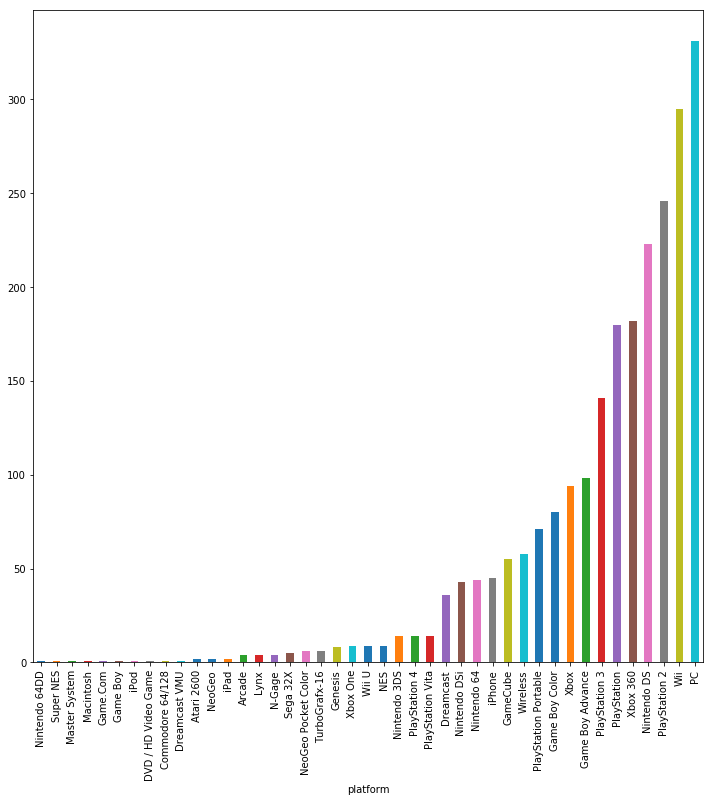

In [18]:
plot_sort_phrases_score("bad")

In [19]:
plot_sort_phrases_score("neutral")

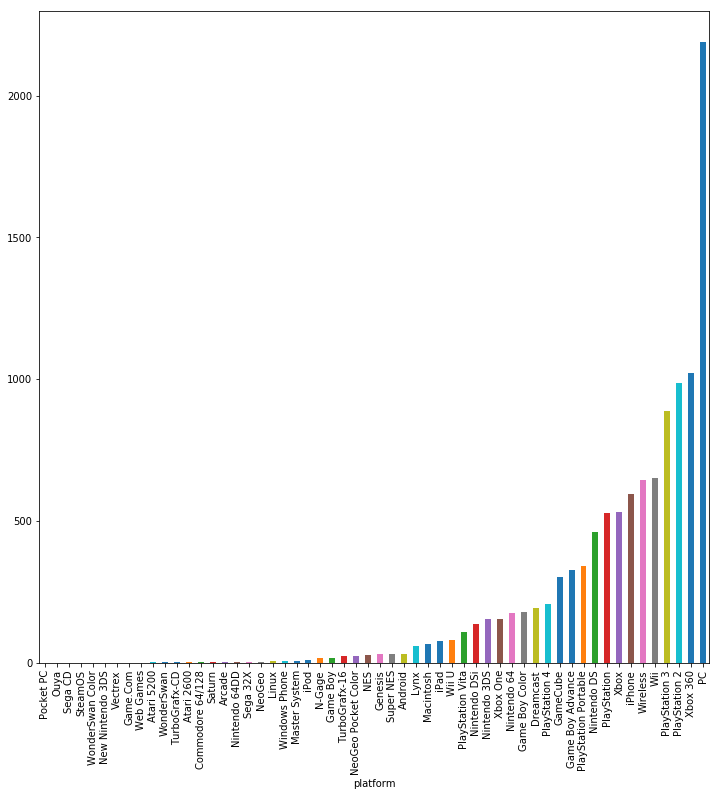

In [20]:
plot_sort_phrases_score("good")

The most popular platform (highest number of reviews - good, neutral, and bad) per number of reviews is PC. It also has twice the number of positive reviews as the next most reviewed platform, XBox 360.

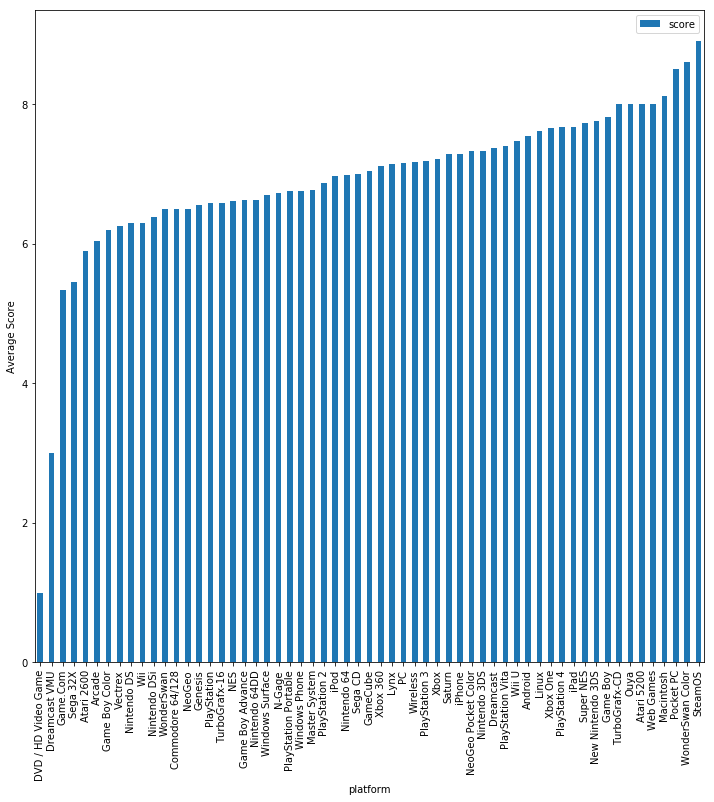

In [21]:
ax = platform_review[["platform", "score"]].groupby("platform").mean().sort_values(by="score").plot( kind="bar", figsize=(12,12))
ax.set_ylabel("Average Score")
plt.show()

However, if raw average score is plotted, it's clear that SteamOS has the highest average rating.

### Are blockbuster games released at a specific time of the year?

In [22]:
# borrow ordinal phrase from earlier
review_month = pd.concat([ordinal_phrase, data.loc[:, ["release_month", "score"]]], axis=1)

In [23]:
review_month.head()

ordinal_phrase  release_month  score
0           good              9    9.0
1           good              9    9.0
2           good              9    8.5
3           good              9    8.5
4           good              9    8.5

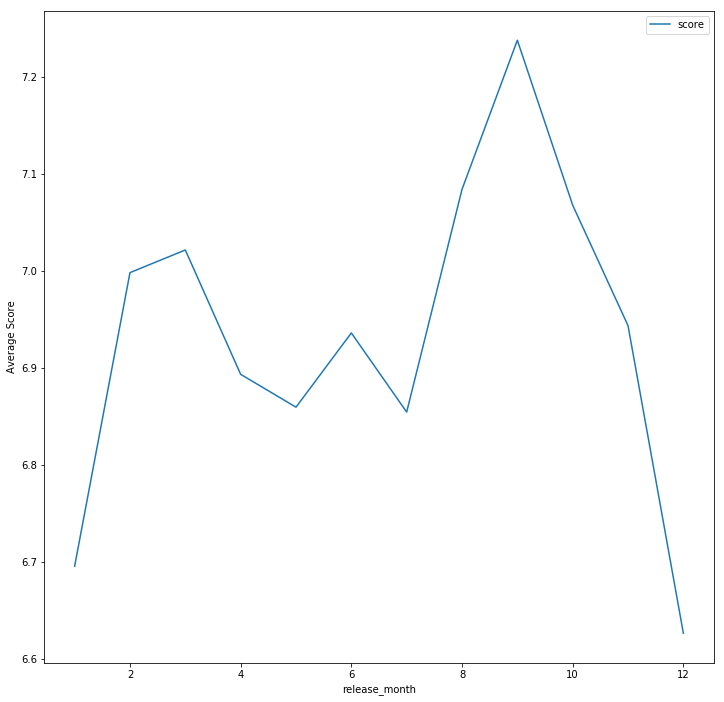

In [24]:
ax = review_month.groupby("release_month").mean().plot(figsize=(12,12))
ax.set_ylabel("Average Score")
plt.show()

In [25]:
ax = review_month.groupby("release_month")["score"].count().plot(kind="bar",
                                                                 figsize=(12,12))
ax.set_ylabel("Score Count")
plt.show()

The average game score peaks around August or September even though the highest number of games are released in November. This might indicate that more higher rated games are actually released between August and September.

In [126]:
# Create formatted date column
date_column = []
date_format = lambda d,m,y: "{}-{}".format(y,m)
d_col = "release_day"
m_col = "release_month"
y_col = "release_year"
parse_row = lambda r: (r[d_col],r[m_col],r[y_col])
date_column = [date_format(
                *parse_row(data.loc[i,[d_col, m_col, y_col]])
                ) 
               for i in range(data.shape[0])]

In [127]:
date_df = pd.DataFrame({"date":date_column})

In [128]:
date_df.head()

date
0  2012-9
1  2012-9
2  2012-9
3  2012-9
4  2012-9

In [129]:
score_time = pd.concat([date_df, data[["score"]]],axis=1)

In [130]:
score_time.sample(5)

date  score
12444  2009-2    9.1
6146   2004-9    7.5
8148   2006-8    4.8
14618  2010-5    8.0
13433  2009-9    7.5

In [131]:
# Alternate method to datetime column
day_month_year = data[[d_col, m_col, y_col]]
day_month_year.columns = ["day","month", "year"]

alt_date_df = pd.DataFrame(pd.to_datetime(day_month_year))
alt_date_df.columns = ["date"]

In [132]:
alt_date_df.loc[9730]

date   2007-09-11
Name: 9730, dtype: datetime64[ns]

In [135]:
mean_by_date = score_time.groupby("date").mean()
mean_by_date = mean_by_date.reset_index("date")
mean_by_date = mean_by_date.sort_values(by="date")

In [134]:
ax = mean_by_date.plot(figsize=(12,12))
ticks = plt.xticks()[0]
ticks = ticks[1:len(ticks)-1]
rows = mean_by_date.shape[0]-1
labels = [mean_by_date.loc[int((i/max(ticks))*rows), "date"] for i in ticks]
plt.xticks(ticks, labels)
plt.show()